# Preprocesamiento de datos

In [ ]:
'''


'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_movies = pd.read_csv('datasets/movies.csv')
df_movies.shape[0]
print(df_movies.columns) #Consultamos todos los nombres de campos del dataset

In [ ]:
df_scores = pd.read_csv('datasets/scores_consolidados.csv')

## Instancias duplicadas

In [ ]:
#Verificamos la cantidad total de registros del archivo movies
print('Total registros en movies:',df_movies.shape[0])

In [ ]:
df_movies[df_movies.duplicated()]

In [ ]:
df_scores[df_scores.duplicated()] #Error de desbordamiento de memoria, el archivo es muy grande.

Observamos que no hay filas duplicadas

## Valores Faltantes

In [ ]:
#pip install missingno 
import missingno as msno

In [ ]:
msno.bar(df_scores)
plt.show()

En el dataframe df_scores no hay valores faltantes. Observemos el dataframe df_movies:

In [ ]:
msno.bar(df_movies)
plt.show()

In [ ]:
# Tomamos 200 muestras al azar de nuestra población
msno.matrix(df_movies.sample(200), labels = True, label_rotation = 90)
plt.show()

In [ ]:
#Analizamos la columna country que es la que presenta mas datos nulos
print('Porcentaje de valores faltantes de la variable country:', (df_movies.country.isnull().sum()/len(df_movies)) * 100, '%')

In [ ]:
# Veamos los valores que asume coutry
df_movies.country.value_counts()

Observamos que la información del campo country NO es importante asi que lo imputamos con un valor simbólico para nuestro estudio y mantenemos esas filas  

In [ ]:
# Colocamos NC (No Country) en las filas donde tengamos valores faltantes en la columna country
df_movies.country.replace(np.nan, 'NC', inplace = True)

In [ ]:
df_movies.country.value_counts()

In [ ]:
#Analizamos la columna director que es la segunda columna que presenta mas datos nulos
print('Porcentaje de valores faltantes de la variable director:', round((df_movies.director.isnull().sum()/len(df_movies)) * 100,2),'%')

In [ ]:
# Veamos los valores asume director
df_movies.director.value_counts()

Observamos que la información del campo director NO es importante asi que lo imputamos con un valor simbólico para nuestro estudio y mantenemos esas filas  

In [ ]:
# Colocamos ND (No Director) en las filas donde tengamos valores faltantes en la columna director
df_movies.director.replace(np.nan, 'ND', inplace = True)

In [ ]:
df_movies.director.value_counts()

In [ ]:
#Analizamos la columna cast que es la tercera columna que presenta mas datos nulos
print('Porcentaje de valores faltantes de la variable cast:', round((df_movies.cast.isnull().sum()/len(df_movies)) * 100,2),'%')

In [ ]:
# Veamos los valores asume cast
df_movies.cast.value_counts()

Observamos que la información del campo cast NO es importante asi que lo imputamos con un valor simbólico para nuestro estudio y mantenemos esas filas  

In [ ]:
# Colocamos NC (No Cast) en las filas donde tengamos valores faltantes en la columna cast
df_movies.cast.replace(np.nan, 'NC', inplace = True)

In [ ]:
df_movies.to_csv('datasets\\movies_sin_nulos.csv')

## Valores atípicos

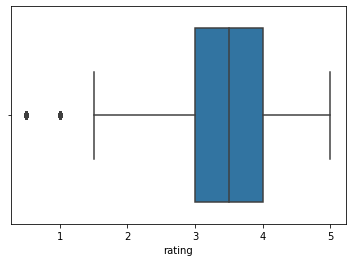

In [7]:
#Campos con valores (máximos) atípicos: rating
sns.boxplot(x = 'rating',  data= df_scores )
plt.show()

No observamos valores atipicos en el dataframe df_scores ya que estan en el rango correcto [0,5]. Estudiemos el dataframe df_movies:

Tomamos la columna release_year

In [ ]:
#Campos con valores (máximos) atípicos: release_year
sns.boxplot(x = 'release_year',  data= df_movies )
plt.show()

In [ ]:
# Se ejecuto dos veces la eliminacion de Outliers para eliminar los valores atipicos
Q1 = df_movies['release_year'].quantile(0.25)
Q3 = df_movies['release_year'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

In [ ]:
print('Cantidad de registros totales:', df_movies.shape[0])
print('Cantidad de outliers:', df_movies[(df_movies['release_year']<BI) | (df_movies['release_year']>BS)].shape[0] )

Eliminamos los outliers

In [ ]:
out_release_year = (df_movies['release_year']<BI) | (df_movies['release_year']>BS) 

df_movies = df_movies[~out_release_year]

In [ ]:
print('Tamaño del dataset, luego de eliminar outliers en release_year:', df_movies.shape[0])

In [ ]:
#Campos con valores (máximos) atípicos: release_year
sns.boxplot(x = 'release_year',  data= df_movies )
plt.show()

In [ ]:
#Hacemos una copia de respaldo de las trasnformaciones realizadas
df_movies.to_csv('datasets\movies_sin_outliers.csv')

Realizamos todos los pasos anteriores para cada uno del resto de campos en los cuales detectamos valores atípicos

In [ ]:
#Almacenamos los cambios hechos sobre el dataframe en un archivo llamado movies.parquet
#df_movies.to_parquet('datasets/movies.parquet')